In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BKVY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BKVY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BKVY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [6]:
# Load the dataset
df = pd.read_csv('../data/UpdatedResumeDataSet.csv')  # Adjust path based on your setup

# Preview
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# Check for nulls
print(df.isnull().sum())

# Remove rows with missing values
df.dropna(inplace=True)


Category    0
Resume      0
dtype: int64


In [9]:
from utils.preprocessing import preprocess_text

# Apply preprocessing
df['processed_resume'] = df['Resume'].apply(preprocess_text)

# Preview
df[['Resume', 'processed_resume']].head()


,Resume,processed_resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uit rgpv data scienti...
2,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill python sap hana tableau sap hana sql sap...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])

# Save encoder for use during prediction
import joblib
joblib.dump(le, '../models/label_encoder.pkl')

# Preview label mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_map)


{'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


In [14]:
os.makedirs("data/interim", exist_ok=True)

df.to_csv('data/interim/cleaned_data.csv', index=False)


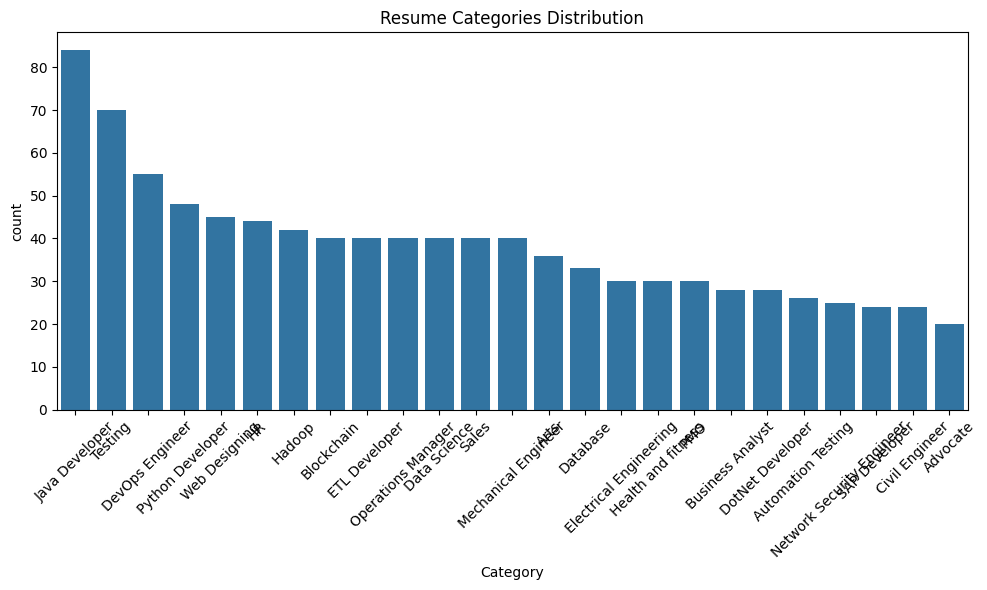

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Resume Categories Distribution")
plt.tight_layout()
plt.show()
